# Review Numpy


Numpy arrays

In [1]:
import numpy as np

## build array

In [2]:
# 建立np数组
x = np.array([1,2,3,4,5,6])
y = np.array([[8,0,7],[3,0,1]])
z = np.random.rand(3,2,3)
zz = np.random.randint(10, size=(3,2,4,5))#随机数上限为10，即为<10
print(f"x,shape={x.shape}:\n{x}\n")
print(f"x,shape={y.shape}:\n{y}\n")
print(f"x,shape={z.shape}:\n{z}\n")

print(zz)

x,shape=(6,):
[1 2 3 4 5 6]

x,shape=(2, 3):
[[8 0 7]
 [3 0 1]]

x,shape=(3, 2, 3):
[[[0.28495036 0.38778679 0.45263299]
  [0.10903602 0.87696677 0.22699022]]

 [[0.95169049 0.56962726 0.79446774]
  [0.30826262 0.35532515 0.66733107]]

 [[0.94803002 0.25060516 0.69680654]
  [0.01506078 0.56701644 0.87609352]]]

[[[[0 9 8 5 1]
   [7 5 9 7 0]
   [0 9 1 4 6]
   [2 4 6 3 4]]

  [[6 0 7 0 6]
   [4 4 2 0 7]
   [4 9 9 4 1]
   [5 8 0 3 9]]]


 [[[4 7 7 7 0]
   [4 6 6 8 7]
   [7 1 3 5 3]
   [1 4 4 5 2]]

  [[0 5 1 6 3]
   [4 9 6 8 2]
   [7 0 2 2 9]
   [4 1 3 7 4]]]


 [[[1 4 1 4 1]
   [5 2 5 2 2]
   [9 7 0 8 6]
   [3 5 0 5 3]]

  [[6 7 8 1 8]
   [0 6 9 6 7]
   [8 3 9 1 1]
   [6 8 0 8 7]]]]


In [ ]:
# 不能建立不合法的np数组
w = np.array([[1,2,3],[4,5]])
print(f"x,shape={w.shape}:\n{w}\n")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

## Access array element

In [3]:
x = np.arange(1,21,1).reshape(4,5)
print(x)
print()
#print slice
print(x[2])

# print point
print(x[2,3])

# print slice, range[a,b)
print(x[2:4,3])


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

[11 12 13 14 15]
14
[14 19]


## Array calculation

numpy具有广播机制


In [4]:
a = np.ones((2,3))

print(a)
print(y)
print(a+y)

[[1. 1. 1.]
 [1. 1. 1.]]
[[8 0 7]
 [3 0 1]]
[[9. 1. 8.]
 [4. 1. 2.]]


In [5]:
# 3被广播为了[[3,3,3],[3,3,3]]与[[1,1,1],[1,1,1]]点乘
a = a * 3
b = np.array([1,2,3])
print(a)
print(b)
# b被广播为了[[1,2,3],[1,2,3]]
print(a+b)

[[3. 3. 3.]
 [3. 3. 3.]]
[1 2 3]
[[4. 5. 6.]
 [4. 5. 6.]]


应当尽可能使用broadcast，因为其具有很多优点
* 简洁的代码
* 保存数据的内存更少
* numpy对底层实现进行了加速。

## Axes

### 多维数组的 Axes
- **二维数组**: 对于形状为 `(rows, columns)` 的数组，`axis 0` 表示行，`axis 1` 表示列。

### 批量矩阵乘法
- **定义**: 在批处理矩阵乘法中，进行操作的是数组的最后两个维度（axis -2 和 axis -1）。
- **形状说明**:
  - 如果有两个数组形状分别为 `(b, n, m)` 和 `(b, m, p)`，
  - 结果的数组将具有形状 `(b, n, p)`，
  - 其中 `b` 是批次数量，每个批次包含一个 `n x m` 矩阵和一个 `m x p` 矩阵的乘法结果。


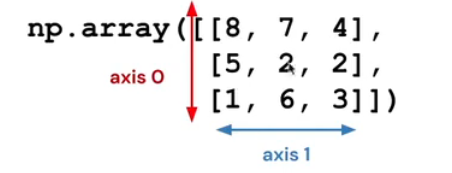

In [6]:
x=np.array([[8,7,4],[5,2,2],[1,6,3]])

print(np.sum(x))
# 结果形状为直接消去axis0
print(np.sum(x,axis=0))
# 结果形状为直接消去axis1
print(np.sum(x,axis=1))

print()

print(np.max(x))

print(np.max(x,axis=0))

print(np.max(x,axis=1))

38
[14 15  9]
[19  9 10]

8
[8 7 4]
[8 5 6]


按axis操作你可以看作如下

假设一个形状为[a1,a2,a3,a4]

对axis = 2执行，那么就是执行`(a1*a2)`次`1*a4`的矩阵加法，最终的结果是[a1,a2,a4]

这就是为什么按哪个axis操作，消去哪个axis的道理。

axis也支持多个axis

In [7]:
z = np.random.randint(10,size=(3,2,4,5))

print(np.sum(z,axis=(0,2)).shape)

(2, 5)


## Shape and Reshape


In [8]:
# numpy严格根据你设定的size，以下两个是不相同的，一个是一维一个是二维
x=np.random.randint(10,size=(10,))
y = np.random.randint(10,size=(10,1))

print(x)
print(y)



[5 0 5 5 0 8 1 3 3 1]
[[5]
 [8]
 [7]
 [4]
 [6]
 [2]
 [4]
 [7]
 [3]
 [5]]


In [9]:
# 此时如果要点乘这两个，那么他们会broadcast为两个n*n矩阵点乘
print(x*y)

[[25  0 25 25  0 40  5 15 15  5]
 [40  0 40 40  0 64  8 24 24  8]
 [35  0 35 35  0 56  7 21 21  7]
 [20  0 20 20  0 32  4 12 12  4]
 [30  0 30 30  0 48  6 18 18  6]
 [10  0 10 10  0 16  2  6  6  2]
 [20  0 20 20  0 32  4 12 12  4]
 [35  0 35 35  0 56  7 21 21  7]
 [15  0 15 15  0 24  3  9  9  3]
 [25  0 25 25  0 40  5 15 15  5]]


In [10]:
# reshape

x_reshaped = x.reshape(-1,1)# -1 means infer this dimension

print(x_reshaped.shape)

(10, 1)


## Array Multiplication


*:点乘

@: 矩阵乘

In [11]:
# 创建一个行向量
row_vec = np.array([[9, 2, 6, 8]])

# 创建一个列向量
col_vec = np.array([[9], [2], [6], [8]])

# 打印原始向量
print("Row vector:", row_vec)
print("Column vector:\n", col_vec)

# 计算点积: 两个向量的点积结果为一个形状为 (1, 1) 的二维数组
dot_product = row_vec.dot(col_vec)
print("Dot product result as (1,1) array:\n", dot_product)

# 使用squeeze方法将形状为(1, 1)的结果转换为一个标量
dot_product_scalar = dot_product.squeeze()
print("Dot product as scalar:", dot_product_scalar)

# 使用转置和shape操作来重新理解数组形状的操作
# 创建一个三维数组，假设代表一堆RGB图像数据（28x28像素，3个颜色通道）
z = np.random.rand(28, 28, 3)

# 打印原始形状
print("Original shape:", z.shape)

# 转置数组以改变轴的顺序：将颜色通道放在前面
z_transposed = z.transpose(2, 0, 1)
print("New shape after transpose:", z_transposed.shape)

# 说明: transpose(2, 0, 1)将数组的轴重新排序，原来的第三个轴（索引为2，颜色通道）
# 变为第一个轴，原来的第一个轴（索引为0，图像高度）和第二个轴（索引为1，图像宽度）
# 分别变为第二个和第三个轴。这在准备图像数据进行机器学习模型训练时非常有用，
# 因为许多深度学习框架要求颜色通道维度在前。

Row vector: [[9 2 6 8]]
Column vector:
 [[9]
 [2]
 [6]
 [8]]
Dot product result as (1,1) array:
 [[185]]
Dot product as scalar: 185
Original shape: (28, 28, 3)
New shape after transpose: (3, 28, 28)


# Review Pytorch

pytorch的tensor与numpy做法相同

### Basic operation

In [12]:
import torch
x = torch.zeros(2,3)
y = torch.ones(2,3)
z = x + y
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [13]:
# 使用dim而非axis
print(torch.sum(z,dim=1))
print(torch.sum(z,dim=0))

tensor([3., 3.])
tensor([2., 2., 2.])


In [14]:
# pytorch broadcast
x = torch.ones((3,1))
y = torch.ones((1,3)) * 2

print(x+y)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


### Move between numpy and pytorch

In [15]:
x_np = np.random.randn(2,3)
print(x_np)

[[ 1.30363195  0.44204634 -0.8109745 ]
 [-0.47754371 -0.64116708 -1.58631798]]


In [16]:
x = torch.from_numpy(x_np)
print(x)

# *******这个tensor与所传过来的numpy共享内存
x_np[:] = 0
print(x)

tensor([[ 1.3036,  0.4420, -0.8110],
        [-0.4775, -0.6412, -1.5863]], dtype=torch.float64)
tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


In [17]:
# 默认type为float64，你可以手动确定
x = torch.from_numpy(x_np).to(torch.float32)
print(x)


tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [18]:
# 你可以直接打印一个tensor的numpy版本，毕竟他们共享一个内存
print(x.numpy())

[[0. 0. 0.]
 [0. 0. 0.]]


### Neural-Network specific funcitons

详细查阅文档

#### Activation


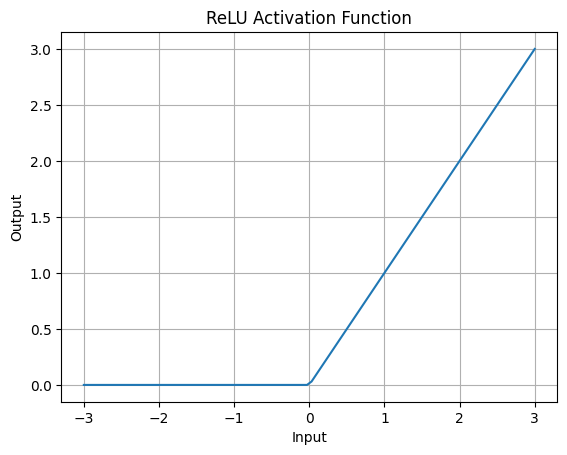

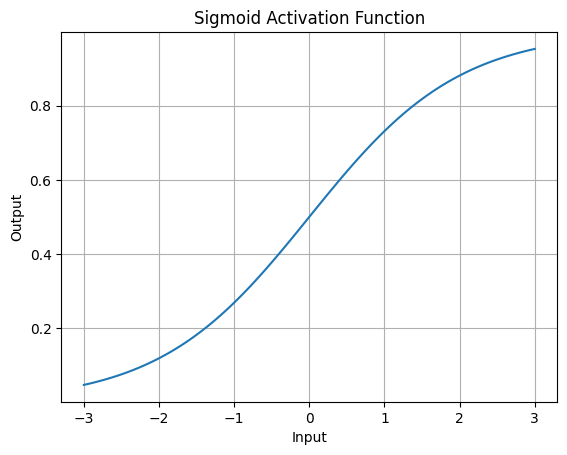

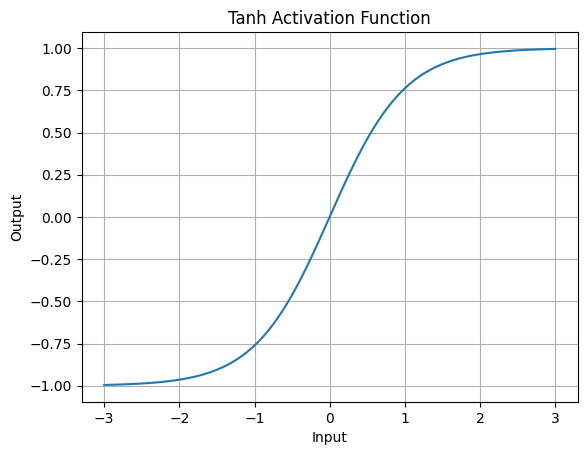

In [19]:

import matplotlib.pyplot as plt  # 导入matplotlib的pyplot模块

# 创建张量 xs，从 -3 到 3，共100个点
xs = torch.linspace(-3, 3, 100)

# 应用 ReLU 激活函数
ys = torch.relu(xs)
plt.plot(xs.numpy(), ys.numpy())  # 使用 plt.plot 来绘图
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

# 应用 Sigmoid 激活函数
ys = torch.sigmoid(xs)
plt.plot(xs.numpy(), ys.numpy())
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

# 应用 Tanh 激活函数
ys = torch.tanh(xs)
plt.plot(xs.numpy(), ys.numpy())  # 确保使用 .numpy() 转换张量为NumPy数组
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

#### Softmax


In [20]:
x = torch.Tensor([[2,3.5],[4,4]])

torch.softmax(x,dim = -1)# 沿着最后一维使用softmax

tensor([[0.1824, 0.8176],
        [0.5000, 0.5000]])

#### 自动微分

In [21]:
shape = (3,)

x = torch.tensor([1.,2,3],requires_grad=True)
y = torch.ones(shape,requires_grad=True)

指定了grad=True就开启了追踪微分的功能，

torch主要追踪两个东西，data和gradient

In [22]:
x.data

tensor([1., 2., 3.])

In [23]:
print(x.grad)# 为none，因为没有对x进行任何计算

None


In [24]:
loss = ((2*x+y)**2).sum()# 逐元素对(2x+y)开方求和
print(loss)

tensor(83., grad_fn=<SumBackward0>)


pytorch隐式的跟踪你开启了grad的参数计算，并建立计算图，所有计算的中间变量tensor都会被赋予grad_fn，表示其参数使用了开启grad的参数，这个中间变量被视为一个funciton

在这里，虽然被命名为 grad_fn=<SumBackward0>，但是它并不代表只有sum，它还暗含了其他的操作

grad_fn 属性的命名通常反映了生成该张量的最后一个操作，并且指向该操作的反向传播函数。对于 SumBackward0，它表示该张量是通过一个求和操作生成的，并且这个求和操作是该张量计算链中的最后一步。==他的每一个中间操作在图中都会有被存储==


建立了计算图之后，我们可以对其中任意一个具有grad_fn的参数call backwards

In [25]:
loss.backward()

In [26]:
print(x.grad)

tensor([12., 20., 28.])


这里计算了x关于loss的梯度。

In [27]:
# other loss
other_loss = (x**2).sum()
other_loss.backward()

In [28]:
print(x.grad)

tensor([14., 24., 34.])


此处，x的梯度实际上是累加了，这就是没有重置梯度后pytorch的处理。

下面是将x梯度清零之后得到的

In [29]:
x.grad.zero_()

tensor([0., 0., 0.])

In [30]:
# other loss
other_loss = (x**2).sum()
other_loss.backward()
print(x.grad)

tensor([2., 4., 6.])


#### 暂停和开启梯度

In [31]:
x.grad.zero_()
y.grad.zero_()
shape = (3,)

x = torch.tensor([1.,2,3],requires_grad=True)

y = torch.ones(shape)
y.requires_grad=True#你可以在申请后手动开启梯度记录，但是必须在所有的计算之前
y1 = y * 2;

loss=((2*x+y)**2).sum()

loss.backward()

print(x.grad)
print(y.grad)



tensor([12., 20., 28.])
tensor([ 6., 10., 14.])


In [32]:
shape=(3,)
x = torch.tensor([1.,2,3],requires_grad=True)
y = torch.ones(shape,requires_grad=True)

y_detached = y.detach()

loss =  ((2 * x + y)**2).sum()

loss.backward()

print(x.grad)
print(y.grad)
print(y_detached.grad)
print(y_detached)





tensor([12., 20., 28.])
tensor([ 6., 10., 14.])
None
tensor([1., 1., 1.])


* y_detached = y.detach() 创建了 y 的一个副本，但这个副本不再追踪梯度。detach() 方法通常用于停止对某个张量的操作记录其梯度，这在一些需要固定权重的场景或在计算验证误差时非常有用，因为这样可以减少内存消耗并提高计算效率。

* print(y_detached.grad) 试图打印 y_detached 的梯度，但这会是 None，因为 y_detached 不追踪梯度。


* print(y.detach()) 打印 y 被 detach 后的值，它应与 y 相同，显示为 [1., 1., 1.]。



当您对一个张量调用 detach() 时，返回的是该张量的一个副本，这个副本与原始张量共享数据，但不参与自动梯度计算（即不会追踪梯度）。这意味着对同一个张量，您可以多次调用 detach()，每次调用都会返回一个新的不追踪梯度的副本。

**何时使用 detach()**


阻止梯度传播：在某些情况下，你可能不希望某些操作影响梯度的反向传播。例如，在训练模型的同时计算一些验证指标时，你可能不希望这些计算干扰梯度。


优化内存使用：在某些情况下，为了减少内存使用，在进行某些计算时不追踪梯度是有帮助的。


**使用 detach() 的效果**


detach() 对原始张量的影响是非破坏性的，原始张量仍然保持其 requires_grad=True 的属性，而 detach() 返回的副本则不追踪梯度。这种设计使得可以灵活地控制何时进行梯度追踪。



换句话说，detach的副本给了你一个脱离grad的副本，你可以用它做其他操作而不用被计入grad。



1. **In-place 操作和 requires_grad=True 的张量
问题**

如果一个张量 x 设置了 requires_grad=True，意味着 PyTorch 需要追踪对其的所有操作以便在反向传播中计算梯度。进行 in-place 操作（即直接修改数据的操作，如 x += 1 或 x[0] = 2）可能会破坏反向传播过程中的梯度计算，**因为这些操作会直接改变原始数据，从而使得保存的用于梯度计算的中间状态失效。**
解决方案：避免对需要梯度的张量进行 in-place 操作，以保证梯度的正确计算。

更具体一些， x += ... 或 x *= ...，或者让x等于一个固定值，Pytorch都会抛出错误


RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.


正确的做法是

x = x + F.relu(self.fc1(x))

其中的区别就是，这些不是就地改变，而是创建了一个新的tensor，完成计算后赋值给x，这是主要区别，就是这个操作构建了计算图，原地计算并不会构建计算图。



2. **将 requires_grad=True 的张量转换为 NumPy 数组
问题：**

PyTorch 张量与 NumPy 数组之间可以相互转换，**但是如果张量设置了 requires_grad=True，则不能直接转换为 NumPy 数组**，因为 NumPy 数组不支持自动梯度计算。
解决方案：在转换前使用 .detach() 方法。这样做会返回一个新的张量，它与原始张量共享数据但不追踪梯度。然后可以安全地将这个“分离”的张量转换为 NumPy 数组，例如：y.detach().numpy()。


3. **对 detach() 返回的张量进行操作的影响
问题：**

虽然使用 detach() 方法可以创建一个不追踪梯度的张量副本，**这个副本仍然与原始张量共享相同的数据存储**。因此，如果修改了这个分离的张量，也会影响原始张量，可能导致在不希望的情况下更改了数据。
解决方案：如果需要对分离的张量进行修改而不影响原始张量，应该在调用 detach() 后立即使用 .clone() 方法。这样会创建一个数据的深拷贝，任何对拷贝的修改都不会影响原始张量。示例代码为：y_detached = y.detach().clone()。

# Example:Regression Task

## 生成数据

torch.Size([100, 1])


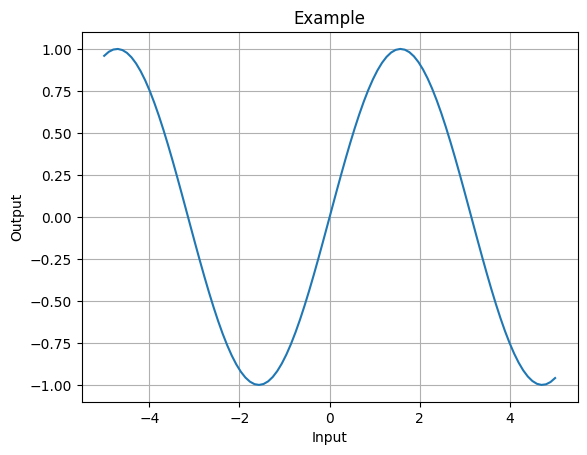

In [33]:
import torch.nn as nn

# 创建一个包含 100 个等间距点的张量，这些点的值从 -5 延伸到 +5。
# view(100, 1) 将这个一维张量重塑为一个二维张量，每行一个元素。
# 这通常在需要将数据输入到期望二维输入的模型时进行。
x = torch.linspace(-5,5,100).view(100,1)

print(x.shape)
# 使用 torch.sin 函数计算 x 的每个元素的正弦值，生成目标值 y_target
y_target = torch.sin(x)
# 实例化一个均方误差（Mean Squared Error, MSE）损失函数
loss_fn = nn.MSELoss()

plt.plot(x, y_target)
plt.title("Example")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()


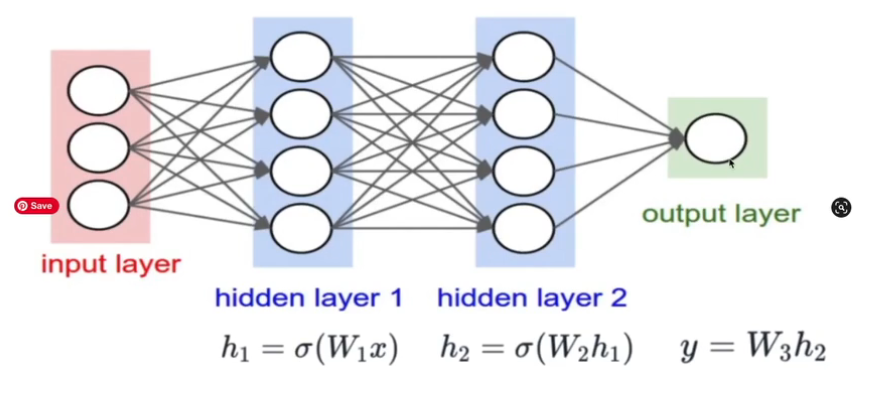

我们计划使用这样一个简单的模型来拟合

## 定义自己的网络

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):# 我们希望自定义的网络结构是Module的subclass
# 网络结构通常是init实例化所有层，在forward中构建他们
  def __init__(self, input_size, output_size):
    super(Net, self).__init__()

    self.fc1 = nn.Linear(input_size,32)
    self.fc2 = nn.Linear(32,32)
    self.fc3 = nn.Linear(32,output_size)


  def forward(self, x):
    x = F.relu(self.fc1(x))

    x = F.relu(self.fc2(x))

    x = self.fc3(x)

    return x

In [35]:
net = Net(input_size = 1, output_size = 1)
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [36]:
x.requires_grad=True
y = net(x)
print(y.shape)

torch.Size([100, 1])


当你使用 net(x) 这种方式调用模型时，实际上你是在调用网络类的 __call__ 方法。在 PyTorch 的 nn.Module 基类中，__call__ 方法被定义为包装 forward() 方法，并在其前后添加了额外的钩子和操作。这意味着 __call__ 方法不仅仅调用 forward()，还处理了以下任务：

前向钩子（Pre-hooks）：在 forward 方法执行之前执行，可以用于修改输入、注册额外的操作等。
后向钩子（Post-hooks）：在 forward 方法执行之后执行，可以用于修改输出、执行某些清理工作等。
额外的状态管理：如跟踪模型是否处于训练模式或评估模式（train 或 eval），确保这些状态在调用 forward 之前正确设置。


直接调用 forward() 方法可能绕过一些重要的设置和钩子，这可能导致模型行为不正确或不一致，特别是在模型有状态管理或需要执行额外操作的情况下。使用 __call__ 确保所有配置和前后处理都得到正确处理。



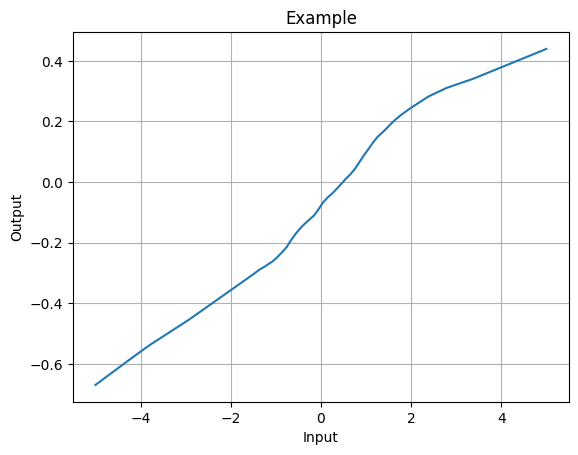

In [37]:
# 未训练的模型
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.title("Example")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

In [38]:
# 使用nn.Module的方法获取更详细的信息
for name, p in net.named_parameters():
  print(name, p.shape)

fc1.weight torch.Size([32, 1])
fc1.bias torch.Size([32])
fc2.weight torch.Size([32, 32])
fc2.bias torch.Size([32])
fc3.weight torch.Size([1, 32])
fc3.bias torch.Size([1])


In [39]:
print(net.fc1.bias.grad)#你可以打印这些网络参数的梯度，目前没有做过backward因此是none

None


注意，你自定义的类不应该使用自定义的层，因为nn.Moduel不会识别自定义结构。


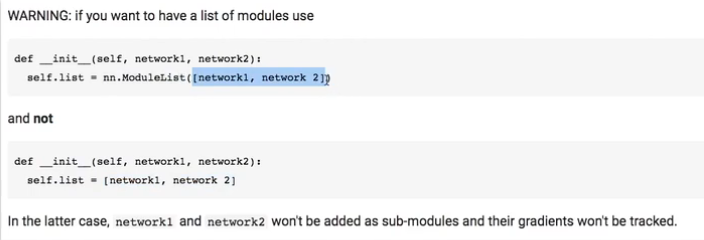

## 如何手动训练一次

In [40]:
# 进行训练一次，squareloss
loss = ((y-y_target)**2).sum()
loss.backward()

## 手动的更新网络参数

In [41]:
for p in net.parameters():
  p.data.add_(-0.001 * p.grad)
  p.grad.data.zero_()

In [42]:
# 用同样的方法多次逼近
for _ in range(100):
  y = net(x)
  # 这里将lossfunction纳入了计算图，是很必要的，即使后面梯度下降代码上看没有用到loss
  loss = ((y-y_target)**2).sum()
  loss.backward()
  for p in net.parameters():
    p.data.add_(-0.001 * p.grad)
    p.grad.data.zero_()

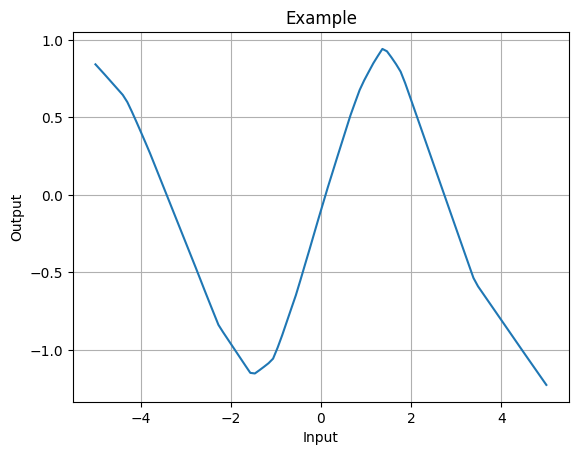

In [43]:
# 看看训练了一百次的结果
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.title("Example")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

## Pytorch为你打包好了：Loss Function

In [44]:
loss_fn = nn.MSELoss()
loss_fn(torch.Tensor([1.4,3.3,1.9]),torch.Tensor([1,3,2]))

tensor(0.0867)

In [45]:
net = Net(input_size=1, output_size = 1)

for _ in range(1000):
  y = net(x)
  loss = loss_fn(y,y_target)
  loss.backward()

  for p in net.parameters():
    p.data.add_(-0.001*p.grad)
    p.grad.data.zero_()

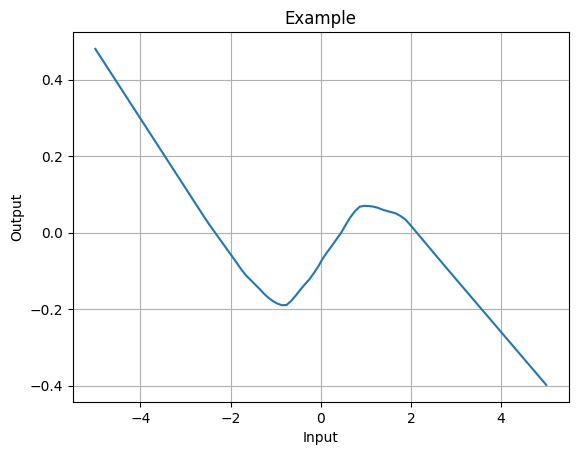

In [46]:
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.title("Example")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

## Pytorch为你打包好了:Optimizers

使用打包好的优化器，而非手动梯度下降

In [47]:
from torch import optim

net = Net(input_size =1, output_size = 1)

optimizer = optim.Adam(net.parameters(),lr = 1e-3)

x = torch.linspace(-5,5,100).view(-1,1)

y = net(x)
y_target = torch.sin(x)
loss_fn = nn.MSELoss()

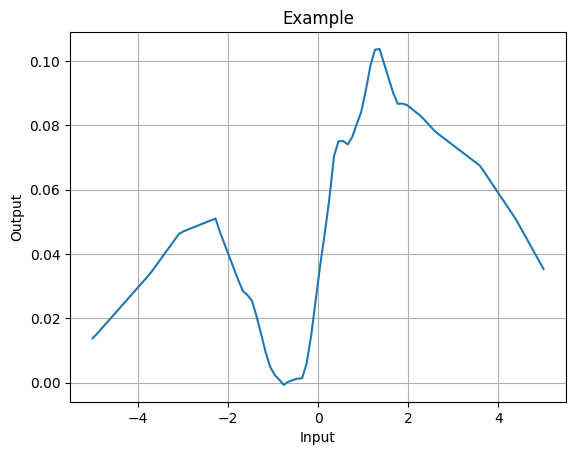

In [48]:
# before training
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.title("Example")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

In [49]:
for _ in range(100):
  y = net(x)
  loss = loss_fn(y,y_target)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

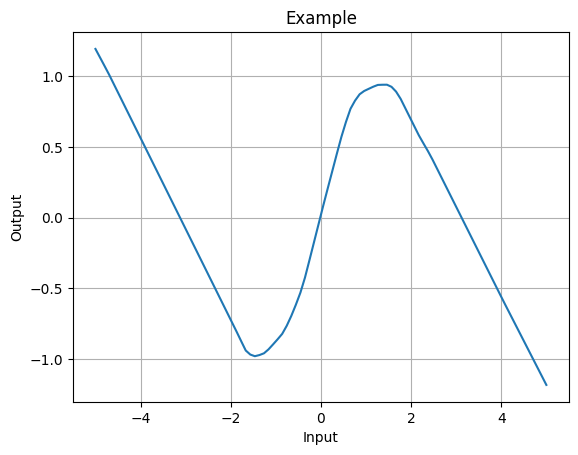

In [50]:
# after training
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.title("Example")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

# GPU support in pytorch

In [51]:
# check whether GPU is available

print(torch.cuda.is_available())
# Initialize a tensor on GPU instead of CPU
device = torch.device("cuda")
y = torch.ones((2,3),device=device)
print(y)

True
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [52]:
# 你只能对在同一个gpu上的数据操作
device = torch.device("cuda")
x = torch.zeros((2,3))
y = torch.ones((2,3),device = device)
z = x + y
# 会发生错误因为数据一个在cuda上，一个在device上

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [54]:
# 将x手动转到GPU
x = x.to(device)
z = x+y
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [55]:
# 不能将gpu上的数据直接转成numpy
x.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [56]:
z_cpu = z.to('cpu')
z_cpu.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

## Training the model


Using device: cuda


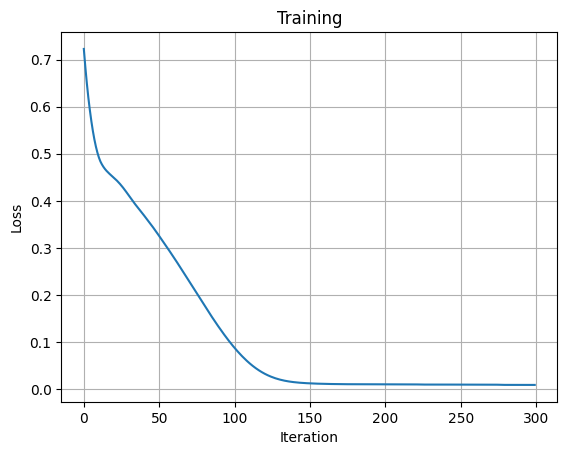

In [62]:
# Define data
x = torch.linspace(-5,5,100).view(-1,1)
y_target = torch.sin(x)


net = Net(input_size = 1, output_size = 1)

###############(new)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:",device)
net = net.to(device)
y_target = y_target.to(device)
###############(new)

optimizer = optim.Adam(net.parameters(),lr=1e-3)
loss_fn = nn.MSELoss()
losses = [] #记录训练轨迹


for _ in range(300):
  #############(new)
  x = x.to(device)
  #############(new)


  y = net(x)# y is in device because  net is in device

  loss = loss_fn(y,y_target)

  losses.append(loss.detach().cpu().numpy())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




# 看看训练过程
x_axis = np.arange(0,300)
plt.plot(x_axis, losses)
plt.title("Training")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Evaluate Model

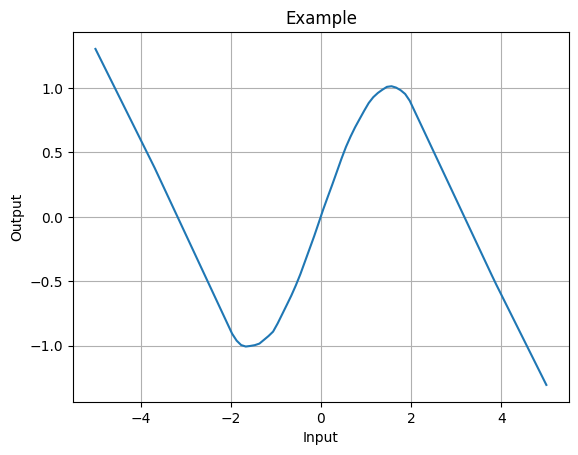

In [67]:
net.eval()#将模型转换为评估模式，这个模式能自动禁用类似dropout和batch norm
with torch.no_grad():# 暂时将梯度记录关闭
  y = net(x)


# 看看训练了三百次的结果
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.title("Example")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()


## 保存模型权重和加载模型权重

**net** 是一个 PyTorch 模型的实例，通常是继承自 torch.nn.Module。




**state_dict** 是模型训练中最关键的部分，因为它包含了模型所有的学习参数。在 PyTorch 中，模型的训练过程本质上是对这些参数的优化。


**torch.save** 是 PyTorch 提供的一个功能，用于将对象序列化并保存到磁盘。这个函数非常灵活，可以保存任意类型的对象，包括模型、张量和字典等。


在这个例子中，torch.save 被用来保存 net.state_dict() 的内容，即模型的参数。


**PATH** 是一个字符串，定义了保存文件的路径和文件名。在这个例子中，文件名是 "checkpoint.pt"。.pt 或 .pth 是 PyTorch 模型文件的常见后缀，但这不是强制的。


将模型保存到硬盘上的这种做法非常有用，尤其是在模型训练过程中定期保存检查点（checkpoint），或在训练完成后保存最终模型以便后续加载和推理使用。

In [68]:
PATH = "checkpoint.pt"
torch.save(net.state_dict(),PATH)

In [71]:
# load
new_model = Net(input_size = 1,output_size=1)

new_model.load_state_dict(torch.load(PATH))
new_model.eval()

for (name1,val1),(name2,val2) in zip(net.to("cpu").state_dict().items(),new_model.state_dict().items()):
  assert name1 == name2 and torch.equal(val1,val2),f"{name1} and {name2} states differ!"

## 使用pytorch distribution



### 概率基础

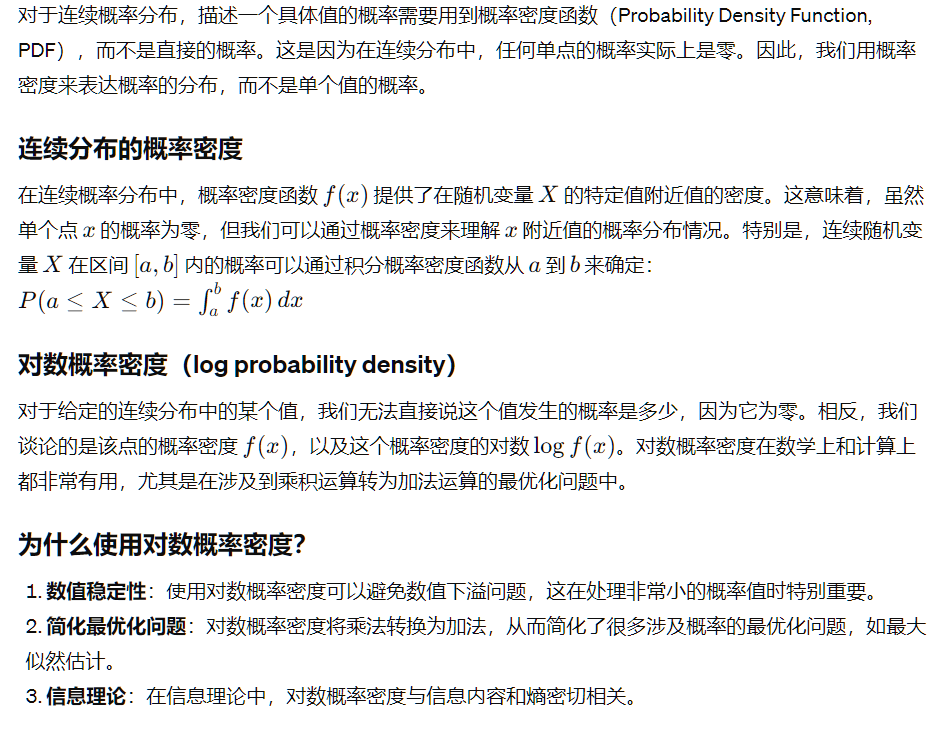

在数学中，概率密度函数（Probability Density Function, PDF）为连续随机变量定义了在任何特定值或点附近的概率密度。要得到某一点在连续分布下的概率密度，我们可以使用该点的概率密度函数计算。以下是详细步骤和解释：

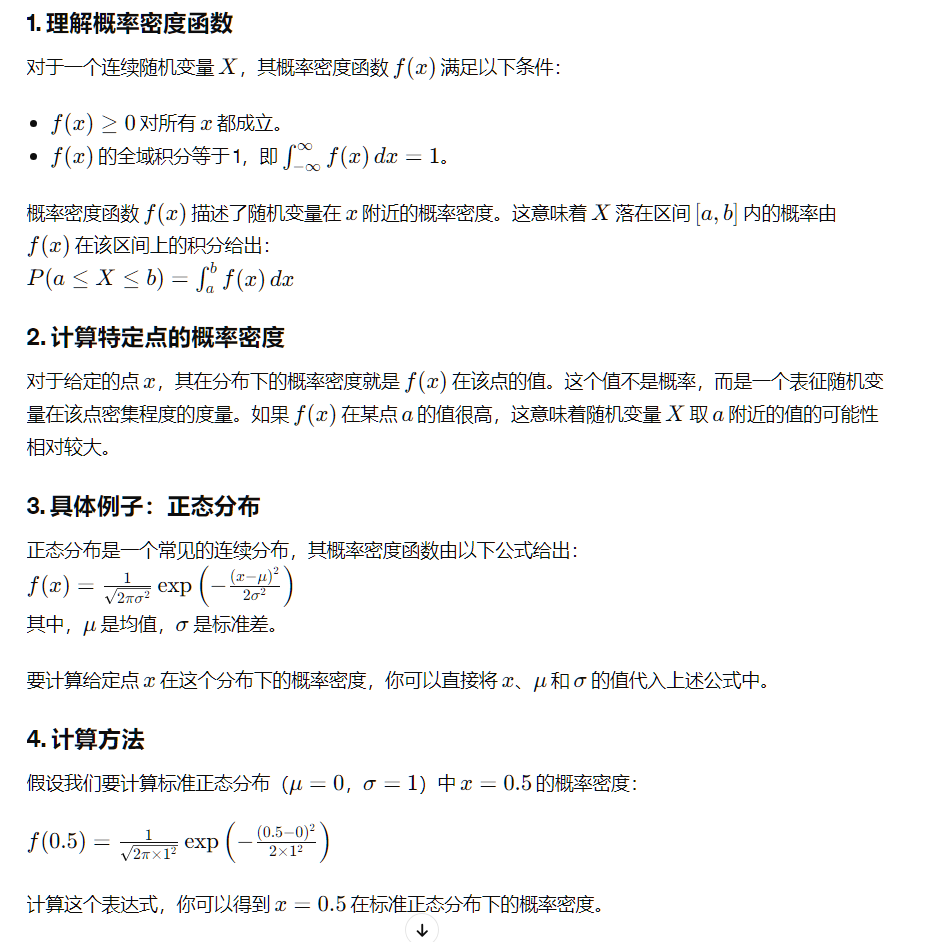

这在RL中挺重要的，因为我们常常与可能需要利用这些distribution来作为目标训练policy

$\pi(a|s_0) = some\ Gaussian\ distribution$

PyTorch 的 distributions 模块提供了一种方便的方式来创建和操作概率分布。这个模块是 PyTorch 中处理随机性的核心工具，它支持许多不同类型的概率分布，包括正态分布（高斯分布）、伯努利分布、多项式分布等。这些分布可以用于生成随机样本或计算概率密度函数（PDF）等。

在强化学习中，distributions 模块的提及非常关键，主要基于以下几点：

**策略梯度方法：**在很多强化学习算法中（特别是策略梯度方法，如 REINFORCE 或 Actor-Critic 方法），策略（policy）通常被定义为一个概率分布。策略基于当前环境状态输出动作的概率分布，而这些动作的选择往往依赖于这些概率模型。


**探索与利用：**使用概率分布可以自然地平衡探索（exploration）和利用（exploitation）的需求。例如，通过调整分布的参数（如增加标准差），策略可以被鼓励去探索看似不那么优的动作。


**梯度优化：**在基于梯度的优化过程中，可以通过对概率分布的参数（如均值和标准差）计算梯度并更新它们来优化策略。这是因为这些参数的梯度可以通过反向传播自动计算，这对于学习复杂的策略是非常有用的。


**连续动作空间：**在处理连续动作空间的问题时，使用概率分布来描述动作是非常自然的方法。例如，动作可能是速度或力的大小，这些可以通过调整分布的参数来连续调节。

### distributions库-创建分布并采样

In [73]:
from torch import distributions


你可以通过传递分布的数据来创建一个分布

In [74]:
# Univariate Gaussian with mean 0 std 1
mean = torch.zeros(1,requires_grad=True)
std = torch.ones(1,requires_grad=True)
gaussian = distributions.Normal(mean,std)

In [75]:
sample = gaussian.sample((1,1))
print(sample)

tensor([[[0.4138]]])


在你提供的代码中，distributions.Normal(mean, std) 创建了一个均值为 0、标准差为 1 的单变量正态分布对象。这个对象可以用来执行如下操作：

采样：sample() 方法从分布中抽取样本。在你的代码中，gaussian.sample((1,1)) 生成了一个形状为 (1, 1) 的样本。


概率密度计算：可以使用 .log_prob(value) 方法计算给**定值(sample)在当前分布下的对数概率密度。**
参数梯度：由于 mean 和 std 设置了 requires_grad=True，这使得可以在梯度下降等优化过程中更新这些参数。




In [78]:
# 在gaussian分布下，取到的数据为sample的对数概率密度
log_prob = gaussian.log_prob(sample)
print(log_prob)

tensor([[[-1.0046]]], grad_fn=<SubBackward0>)



对数概率密度（Log Probability Density）在统计学和机器学习中非常有用，特别是在处理概率模型时。这里讲解一下对数概率密度的用途和计算方法。

用途

**数值稳定性：**在概率计算中，直接使用概率值（尤其是连乘的情况下）可能会导致数值下溢，特别是当概率非常小的时候。使用对数概率可以避免这种问题，因为它将乘法转换为加法，从而提高计算的数值稳定性。


**简化计算：**在很多统计模型中，如最大似然估计（Maximum Likelihood Estimation, MLE）或贝叶斯推断中，需要最大化或最小化概率的乘积。对数转换后，乘积变成了求和，这简化了求导和优化过程。

假设有一个概率分布，例如正态分布Normal(mean,std)，对于一个给定的数据点$x$，其概率密度函数(Prossibility Density Function)PDF可以记为$P(x)$。对数概率密度是$P(x)$的自然对数，记作$log P(x)$

对于正态分布，概率密度函数为
$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$

其中,$\mu$是均值，$\sigma$是标准差，其对数概率密度则为
$$
logP(x) = -1/2 log(2\pi\sigma^2)-\frac{(x-\mu)^2}{2\sigma^2}
$$

对数概率(log_prob)是一个依赖于分布的参数，这意味着如果你在一个损失函数中使用 log_prob 并调用 backward() 进行梯度计算，PyTorch 会自动计算这些分布参数的梯度。这对于学习分布参数（如在变分自编码器（VAE）中的情况）是必需的。

**梯度的反向传播不通过样本**
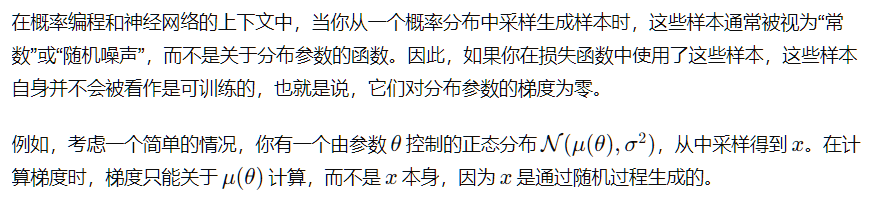



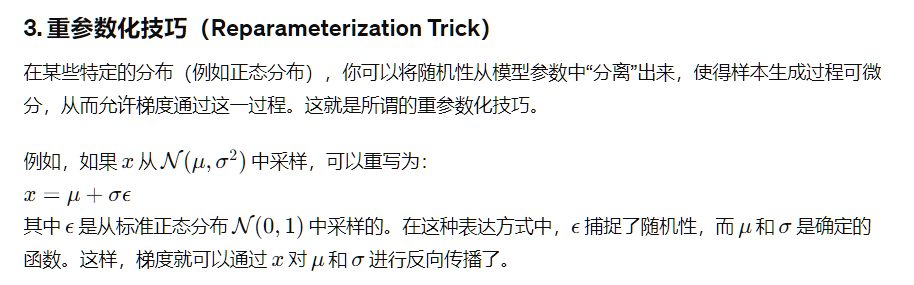

在机器学习模型，如变分自编码器（VAE）中，重参数化技巧非常关键。VAE的目标是优化编码器生成的隐变量分布的参数，使得通过解码器从这些隐变量生成的数据尽可能接近原始数据。

通过使用重参数化技巧，模型在训练过程中可以通过梯度下降直接对隐变量分布的参数（例如均值和标准差）进行优化。这使得整个学习过程可以利用基于梯度的优化算法（如SGD或Adam），从而有效地调整模型参数以最小化重构误差和正则化项（通常是KL散度）。


In [79]:
loss = -log_prob.sum()



In [80]:
loss.backward()

In [81]:
print(std.grad)

tensor([0.8287])


In [82]:
print(mean.grad)

tensor([-0.4138])


In [83]:
print(sample.grad)

None


### 批量创建分布操作

distributions支持batch-operations

在以下的例子中，所有的操作(sample,log_prob等）都是批量操作

In [84]:
mean = torch.zeros(10)
std = torch.ones(10)
gaussian = distributions.Normal(mean,std)

In [87]:
print(gaussian)
print(gaussian.batch_shape)

Normal(loc: torch.Size([10]), scale: torch.Size([10]))
torch.Size([10])


记得一次sample是直接按照batch distribution sample一次，所以sample的参数应该是sample几次的意思

In [88]:
sample = gaussian.sample((1,))
print(sample)

tensor([[-1.1171, -0.2789, -1.1506,  0.8649, -0.7840, -0.8572,  1.0766,  1.8118,
          0.0436, -0.2478]])


In [89]:
sample = gaussian.sample((3,))#会生成一个3*10的sample结果
print(sample)

tensor([[ 0.2975, -1.0994, -1.0538, -0.8563, -0.5772, -1.4569,  0.2896,  0.0361,
         -0.8264,  0.6345],
        [ 0.2939, -0.0643, -0.4914, -1.2012, -0.2537, -0.1651, -0.5292,  1.8636,
         -0.0358,  0.9878],
        [ 0.1448,  0.0067,  2.1061,  2.7178,  1.6703,  0.4014,  0.1112,  0.1289,
         -0.1524, -1.6645]])


In [90]:
gaussian.log_prob(sample)#每个值的对数概率密度

tensor([[-0.9632, -1.5233, -1.4742, -1.2855, -1.0855, -1.9802, -0.9609, -0.9196,
         -1.2604, -1.1203],
        [-0.9621, -0.9210, -1.0397, -1.6403, -0.9511, -0.9326, -1.0589, -2.6554,
         -0.9196, -1.4068],
        [-0.9294, -0.9190, -3.1368, -4.6123, -2.3138, -0.9995, -0.9251, -0.9273,
         -0.9305, -2.3041]])

### 多元正态分布


多元正态分布描述了多个相关或者不相关的随机变量的联合分布情况。这种分布能够用来模拟现实世界中多个变量之间的复杂关系，其中变量间可能存在线性相关性。每个变量本身遵循正态分布，而变量之间的相关性通过协方差矩阵表达。

换句话说，考虑
$$
[x_1,x_2,...,x_n]
$$
这n个随机变量，他们都满足正态分布。我们需要n个mean描述这n个随机变量的平均，以及n*n的协方差矩阵表达他们的相关性。


协方差矩阵的对角线上的元素是各个变量自身的方差（即标准差的平方），反映了每个变量自身的变异性。
矩阵的非对角线元素表示不同变量之间的协方差，反映了变量之间的线性依赖性。正值表明正相关（一个变量增加，另一个也增加），负值表明负相关（一个变量增加，另一个减少）。



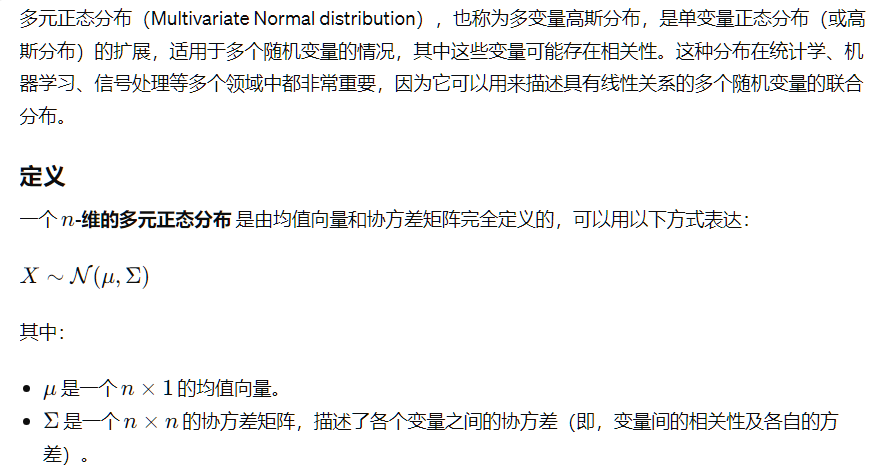

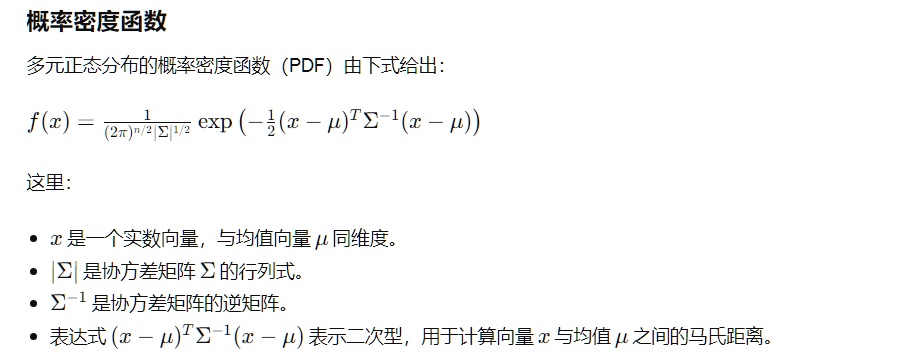

因为这里的mean，std参数也是多维的，很容易与批量一元分布搞混。

In [91]:
mean = torch.zeros(2)

covariance = torch.tensor(
    [[1,0.8],
    [0.8,1]]
)

gaussian = distributions.MultivariateNormal(mean,covariance)

In [92]:
print(gaussian)

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))


In [94]:
gaussian.sample((1,))

tensor([[-0.3403,  0.3980]])

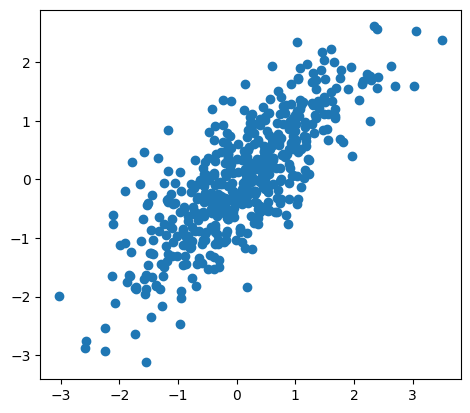

In [99]:
# 这段代码是用来从一个多元正态分布中抽取样本并将它们在二维平面上进行可视化

# 从多元正态分布 'gaussian' 中采样 500 个样本，应该是500*n的shape
samples = gaussian.sample((500,))
# 设置当前坐标轴的纵横比为相等
plt.gca().set_aspect("equal")
# 取出所有样本的第一维和第二维的数据，使用散点图将采样点绘制在二维平面上
plt.scatter(samples[:,0].numpy(),samples[:,1].numpy())

### 多元正态分布中的三个shape

首先是对于多元正态分布，我们使用3*2*2的协方差矩阵
这意味着这是一个批处理多元正态分布

每次采样，我们的每个单个多元正态分布采样自己的2*2协方差矩阵，批大小为3

In [100]:
mean = torch.zeros(2)
covariance = torch.tensor(
    [
        [
            [1,0.8],
            [0.8,2]
        ],
        [
            [1,-0.2],
            [-0.2,1]
        ],
        [
            [4,0.6],
            [0.6,0.5]
        ]
    ]
)

gaussian = distributions.MultivariateNormal(mean,covariance)
sample = gaussian.sample((5,))#采样五次，shape应该为5*3*2
print(gaussian.batch_shape)
print(gaussian.event_shape)
print(sample.shape)

torch.Size([3])
torch.Size([2])
torch.Size([5, 3, 2])


因此，在批量多元正态分布中，用以下几个命名

Batch shape：批大小

Event shape：随机变量个数

Sample shape： 采样次数

### Categorical Distribution

Categorical Distribution（分类分布）是概率论中一种描述有限多个可能结果的随机变量的分布，其中每个结果都有一个确定的概率。这种分布通常用于模型具有固定数量类别的情况，每个类别都有一个相应的概率。


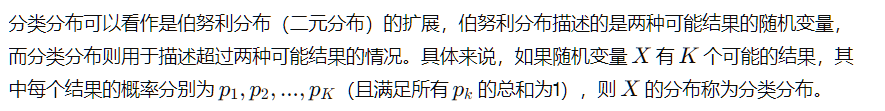


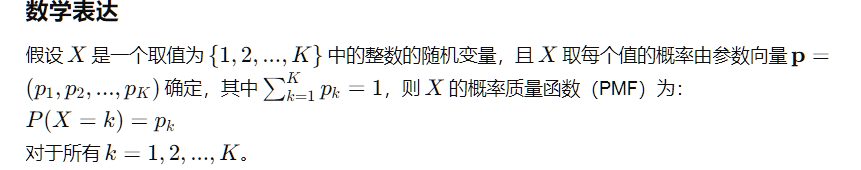

分类分布在统计学、机器学习和许多其他领域中有广泛的应用。以下是一些常见的应用场景：

**自然语言处理（NLP）：**

在语言模型中，预测下一个单词的出现可以用分类分布来模型化，其中每个单词的概率由模型给出。

**机器学习分类任务：**

在进行多类分类时，最后的输出层通常使用softmax函数来将神经网络输出转化为概率分布，这些概率可以视为分类分布，用于选择最可能的类别。

**推荐系统：**

分类分布可用于模拟用户对不同项目的选择概率。

**决策分析：**

在任何需要从一组有限选项中作出选择的场景中，每个选项被选中的概率可以用分类分布来描述。

In [101]:
# 创建一个离散分布
probs = torch.tensor([0.1,0.2,0.7])

dist = distributions.Categorical(probs=probs)

In [103]:
# 从自己创建的离散分布采样
sample = dist.sample([20])
print(sample)

tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0])


In [105]:
dist.log_prob(sample)

tensor([-0.3567, -0.3567, -0.3567, -1.6094, -0.3567, -0.3567, -0.3567, -0.3567,
        -1.6094, -0.3567, -0.3567, -0.3567, -1.6094, -1.6094, -0.3567, -0.3567,
        -0.3567, -0.3567, -0.3567, -2.3026])

### 在神经网络中使用分布

In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self,input_size,output_size):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size,32)
    self.fc2 = nn.Linear(32,32)
    self.fc3 = nn.Linear(32,output_size)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [111]:
mean_network = Net(1,1)
x = torch.randn(100,1)#random input
mean = mean_network(x)
# batched Normal，通过网络训练100个分布，每个分布的均值就是网络输出的结果，网络的输入是随机值，std=1
distribution = distributions.Normal(x,scale=1)
distribution

Normal(loc: torch.Size([100, 1]), scale: torch.Size([100, 1]))

当然，你也可以直接让网络输出分布，不用手动转换，因为pytorch中的distribution也支持反向传播

In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self,input_size,output_size):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size,32)
    self.fc2 = nn.Linear(32,32)
    self.fc3 = nn.Linear(32,output_size)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return distributions.Normal(x,scale=1)


In [114]:
distribution_network = Net(1,1)
distribution_network

Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [115]:
x = torch.randn(100,1)
distribution = distribution_network(x)
distribution

Normal(loc: torch.Size([100, 1]), scale: torch.Size([100, 1]))

### 训练一个条件高斯模型(Conditional Gaussian model)

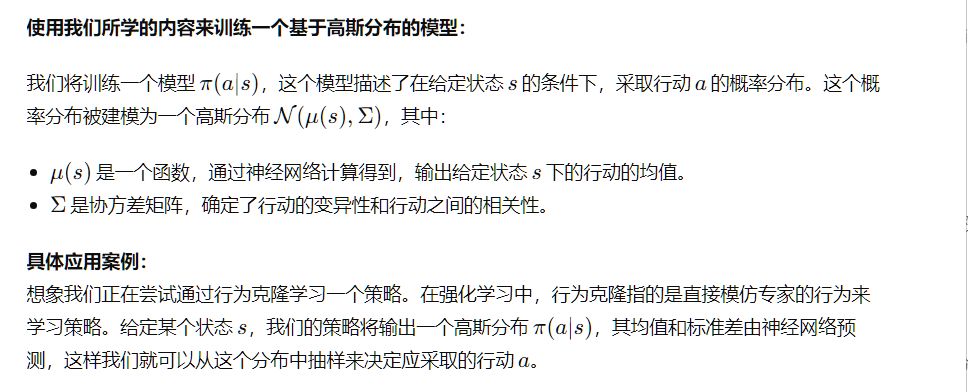

In [117]:
# 为了更方便的学习，我们返回训练好的均值和方差
class GaussianPolicy(nn.Module):
  def __init__(self, input_size, output_size):
    super(GaussianPolicy, self).__init__()

    self.mean_fc1 = nn.Linear(input_size,32)
    self.mean_fc2 = nn.Linear(32,32)
    self.mean_fc3 = nn.Linear(32,output_size)
    # why learn log_std instead of std? 因为训练概率，数值很小时会发生下溢
    self.log_std = nn.Parameter(torch.randn(output_size))

  def forward(self,x):
    mean = F.relu(self.mean_fc1(x))
    mean = F.relu(self.mean_fc2(mean))
    mean = self.mean_fc3(mean)
    return mean,self.log_std


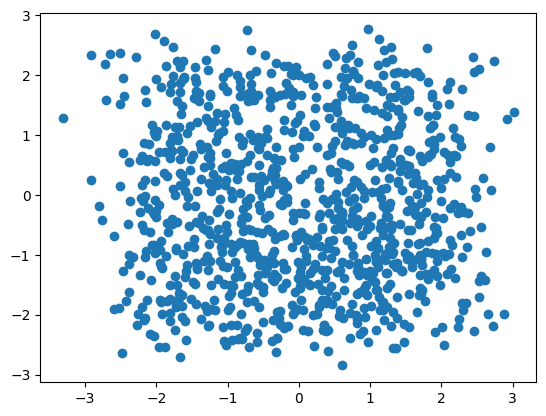

In [120]:
# 通过模拟的方式生成了一组数据，具体来说是从一个多元正态分布中生成了“专家行动”
# 考虑我们给出了1000个状态，每个状态是一个二维张量，专家会根据这个状态给出其行动，你的目标就是拟合专家的策略



states = torch.rand(1000,2) - 0.5# 1000个二维state
# torch.rand(1000, 2) 生成了一个范围在 [0, 1) 内的随机张量，
# 然后通过 - 0.5 转换到了 [-0.5, 0.5) 范围内，使得状态数据均匀分布在中心点周围。

# 设置专家数据的means和conv
true_means = states**3 + 4.5*states
true_conv = torch.diag(torch.Tensor([0.1,0.05]))
# 矩阵的对角线元素分别是 0.1 和 0.05，表示两个维度的方差，而矩阵的非对角线元素均为 0，表明两个维度相互独立，没有相互影响。

# 创建多元正态分布，采样一次
expert_actions = torch.distributions.MultivariateNormal(true_means,true_conv).sample()
# 专家行动在二维空间中可视化。每个点的两个坐标对应于从多元正态分布中抽取的两个行动维度。
# 每个行动是一个二维张量
plt.scatter(expert_actions[:,0],expert_actions[:,1])

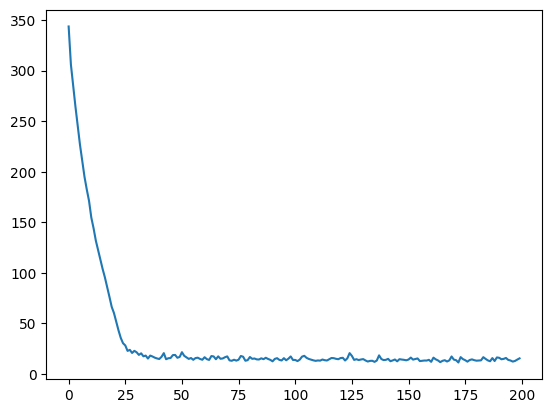

In [126]:
from torch.utils.data import DataLoader,TensorDataset

policy = GaussianPolicy(2,2) #实例化

optimizer = optim.Adam(policy.parameters(),lr = 0.01)# 优化器

# 数据集，相当于标准input-output数据集
dataset = TensorDataset(states,expert_actions)
# 从数据池中批量梯度下降
loader = DataLoader(dataset,batch_size = 64,shuffle=True)


losses = []


for epoch in range(200):
  epoch_loss = 0
  for curr_states,curr_actions in loader:
    # curr_states,curr_actions作为input输入，input的shape为[batch_size, input_size]
    # nn.Linear等网络层自动适配了batch操作

    # 前向传播一次
    mean,log_std = policy(curr_states)
    # 利用当前policy的distribution采样一次
    dist = torch.distributions.Normal(mean,torch.exp(log_std))

    # 计算批量总损失
    # 这里使用sum每一步会下降的更快，收敛就更快，不过不适应大批量,而且相比sum效果更差
    # loss = -dist.log_prob(curr_actions).mean()
    loss = -dist.log_prob(curr_actions).sum()


    optimizer.zero_grad()
    loss.backward()
    epoch_loss+= loss.detach().cpu().numpy().squeeze()
    optimizer.step()
  losses.append(epoch_loss / len(loader))


plt.plot(losses)

dist.log_prob(curr_actions) 计算每个采样行动（curr_actions）在当前策略下的对数概率。对数概率告诉我们给定行动在策略建议的分布下出现的自然对数概率。


取这些对数概率的负值，因为优化过程通常是最小化损失。在概率术语中，我们尝试最大化这些行动的概率；而在优化术语中，这等同于最小化负的对数概率的和。


.sum() 是将所有样本的损失相加，形成批次的总损失。

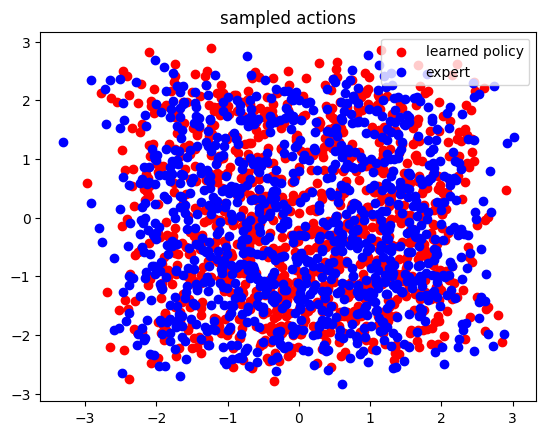

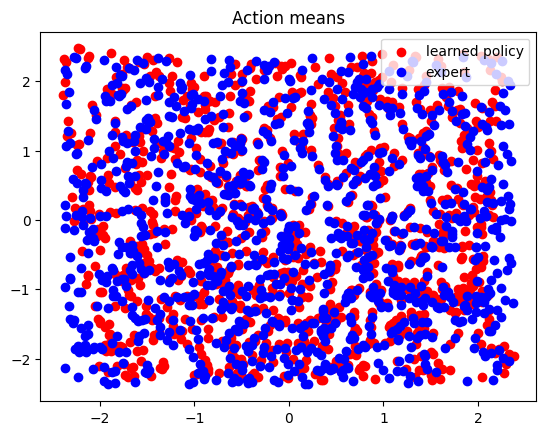

In [125]:
policy.eval()
with torch.no_grad():
  mean,log_std = policy(states)
  dist = torch.distributions.Normal(mean,torch.exp(log_std))
  pred_means = dist.mean.cpu().numpy()
  pred_actions = dist.sample().cpu().numpy()

plt.figure()
plt.title("sampled actions")
plt.scatter(pred_actions[:,0],pred_actions[:,1],color='r',label='learned policy')
plt.scatter(expert_actions[:,0],expert_actions[:,1],color='b',label='expert')
plt.legend()


plt.figure()
plt.title("Action means")
plt.scatter(pred_means[:,0],pred_means[:,1],color='r',label = 'learned policy')
plt.scatter(true_means[:,0],true_means[:,1],color='b',label='expert')
plt.legend()